In [1]:
import keras
from keras.applications.inception_v3 import InceptionV3, preprocess_input
import keras.models as models
from keras.layers import UpSampling2D, Dense, Dropout, Flatten
from keras.optimizers import RMSprop
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

## Load the dataset

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen = datagen.flow(x_train, y_train, batch_size=32, shuffle=True)
test_gen = datagen.flow(x_test, y_test, batch_size=32, shuffle=False)

In [5]:
train_gen.x.shape

(50000, 32, 32, 3)

## load the pretrained model

In [5]:
# Load the model except fully connected model
inception_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
inception_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 111, 111,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 109, 109,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 109, 109,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 54, 54,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 54, 54,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 52, 52,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

## Frozen the feature layers

In [6]:
inception_model.trainable = False

In [ ]:
for layer in inception_model.layers:
  print(layer.name, layer.trainable)

input_layer_1 False
conv2d_94 False
batch_normalization_94 False
activation_94 False
conv2d_95 False
batch_normalization_95 False
activation_95 False
conv2d_96 False
batch_normalization_96 False
activation_96 False
max_pooling2d_4 False
conv2d_97 False
batch_normalization_97 False
activation_97 False
conv2d_98 False
batch_normalization_98 False
activation_98 False
max_pooling2d_5 False
conv2d_102 False
batch_normalization_102 False
activation_102 False
conv2d_100 False
conv2d_103 False
batch_normalization_100 False
batch_normalization_103 False
activation_100 False
activation_103 False
average_pooling2d_9 False
conv2d_99 False
conv2d_101 False
conv2d_104 False
conv2d_105 False
batch_normalization_99 False
batch_normalization_101 False
batch_normalization_104 False
batch_normalization_105 False
activation_99 False
activation_101 False
activation_104 False
activation_105 False
mixed0 False
conv2d_109 False
batch_normalization_109 False
activation_109 False
conv2d_107 False
conv2d_110 Fal

### Added custom classification layers

In [7]:
from keras.layers import Resizing

model = models.Sequential()

# # Up sampling the model ### Don't use it
model.add(UpSampling2D((2, 2))) # 32 * 2 = 64
model.add(UpSampling2D((2, 2))) # 64 * 2 = 128
model.add(UpSampling2D((2, 2))) # 128 * 2 = 256
model.add(Resizing(224, 224, interpolation='bilinear'))

# Add pretrained model
model.add(inception_model)

# Adding classification layers
model.add(Flatten())
model.add(Dense(528, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

## Compile and Train the model

In [8]:
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_gen, batch_size=64, epochs=5, validation_data=test_gen)

model.save('/content/drive/MyDrive/Computer_vision/model/inception_v3_e5.keras')

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6653 - loss: 5.0148

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 151s 85ms/step - accuracy: 0.6653 - loss: 5.0127 - val_accuracy: 0.8381 - val_loss: 0.6453
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 73ms/step - accuracy: 0.7867 - loss: 0.8409 - val_accuracy: 0.8234 - val_loss: 0.7734
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 76ms/step - accuracy: 0.7997 - loss: 0.8136 - val_accuracy: 0.8370 - val_loss: 0.8179
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.8107 - loss: 0.7882 - val_accuracy: 0.8294 - val_loss: 0.8725
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.8162 - loss: 0.7723 - val_accuracy: 0.8375 - val_loss: 0.9514


## Load the model

In [8]:
loaded_model = keras.saving.load_model('/content/drive/MyDrive/Computer_vision/model/inception_v3_e5.keras')

## Model inferencing

In [23]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

In [12]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [20]:
def infer(img_path, model, classes):
  img = load_img(img_path, target_size=(224, 224))
  img_arr = img_to_array(img)
  img_batch = np.expand_dims(img_arr, axis=0)

  preprocessed = preprocess_input(img_batch)

  pred = model(preprocessed, training=False)
  res = np.argmax(pred[0])
  label = classes[res]

  return label

Image of truck.



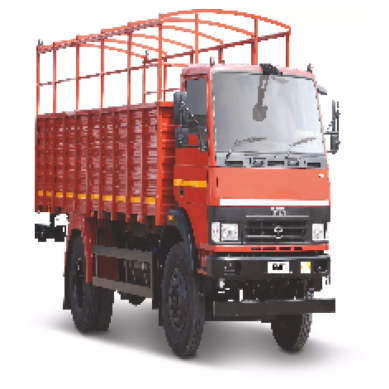

In [30]:
img_path = '/content/103642063.png'
res = infer(img_path, loaded_model, classes)

print(f'Image of {res}.\n')
img = load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()